In [1]:
from src.detect_events import (
    calc_sta_lta,
    get_args_over_sta_lta_threshold,
    get_profile_details,
)
from src.get_seismogram import get_seismogram_iris
from src.plots import plot_event_detection, plot_spectrogram
from src.preprocess import reduce_noise, remove_response

In [2]:
STARTTIME = [1971, 7, 11, 8, 30]
ENDTIME = [1971, 7, 11, 18, 30]

st_raw = get_seismogram_iris(
    starttime=STARTTIME,
    endtime=ENDTIME,
)
st = remove_response(
    st_raw,
    starttime=STARTTIME,
    endtime=ENDTIME,
)

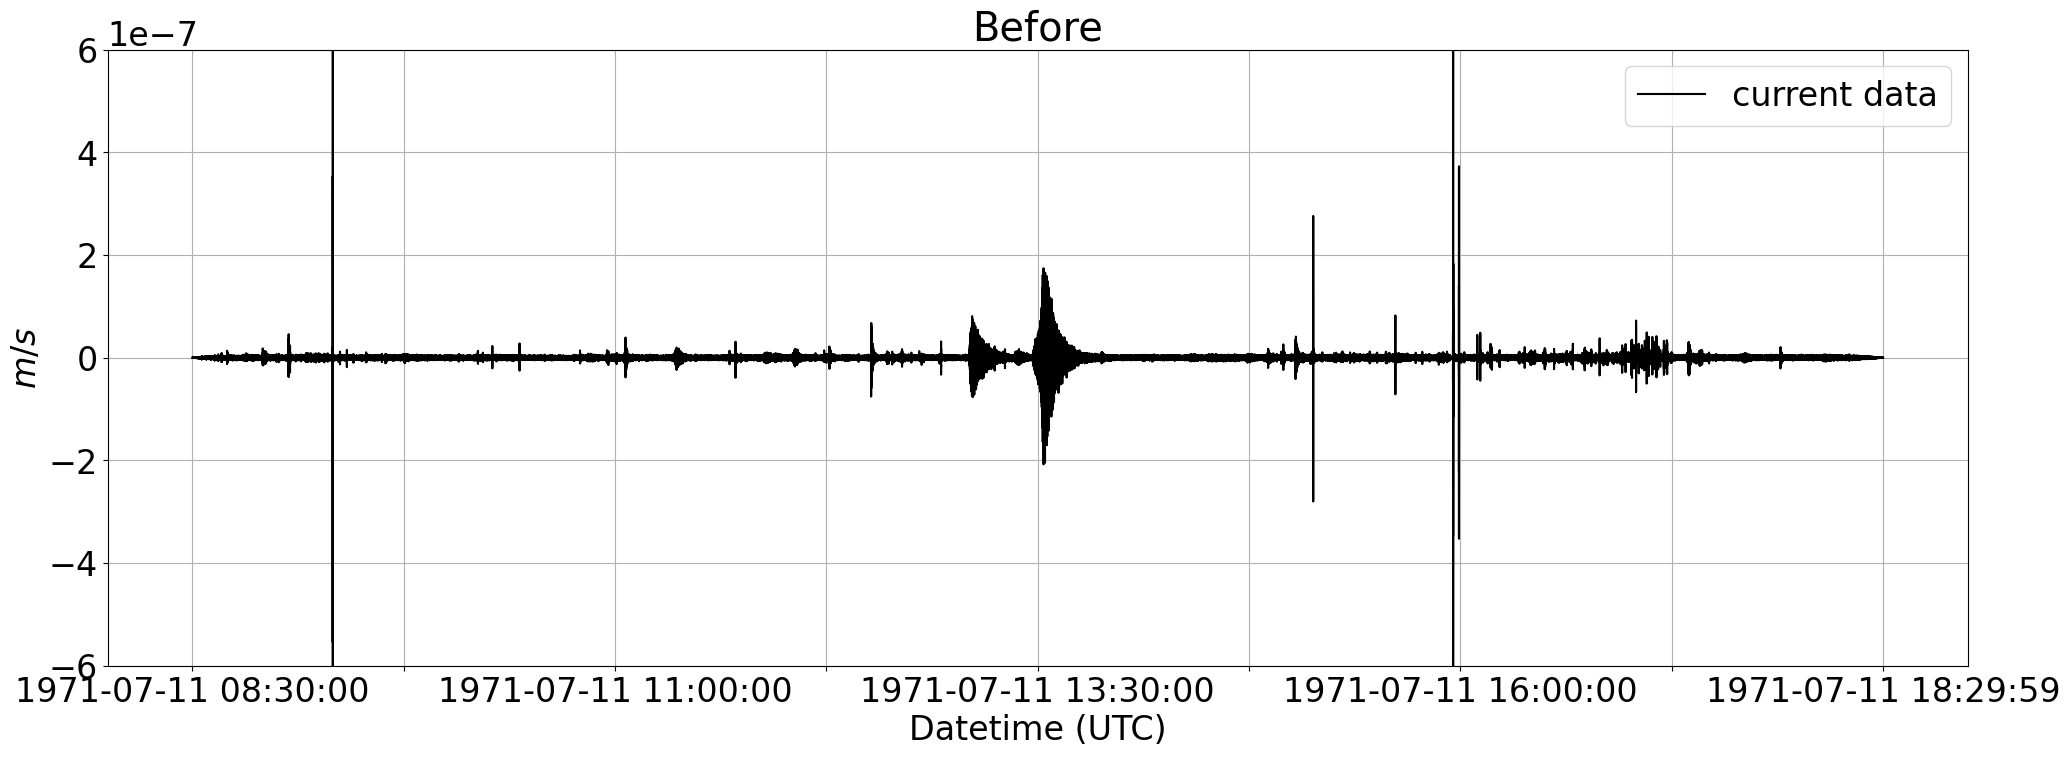

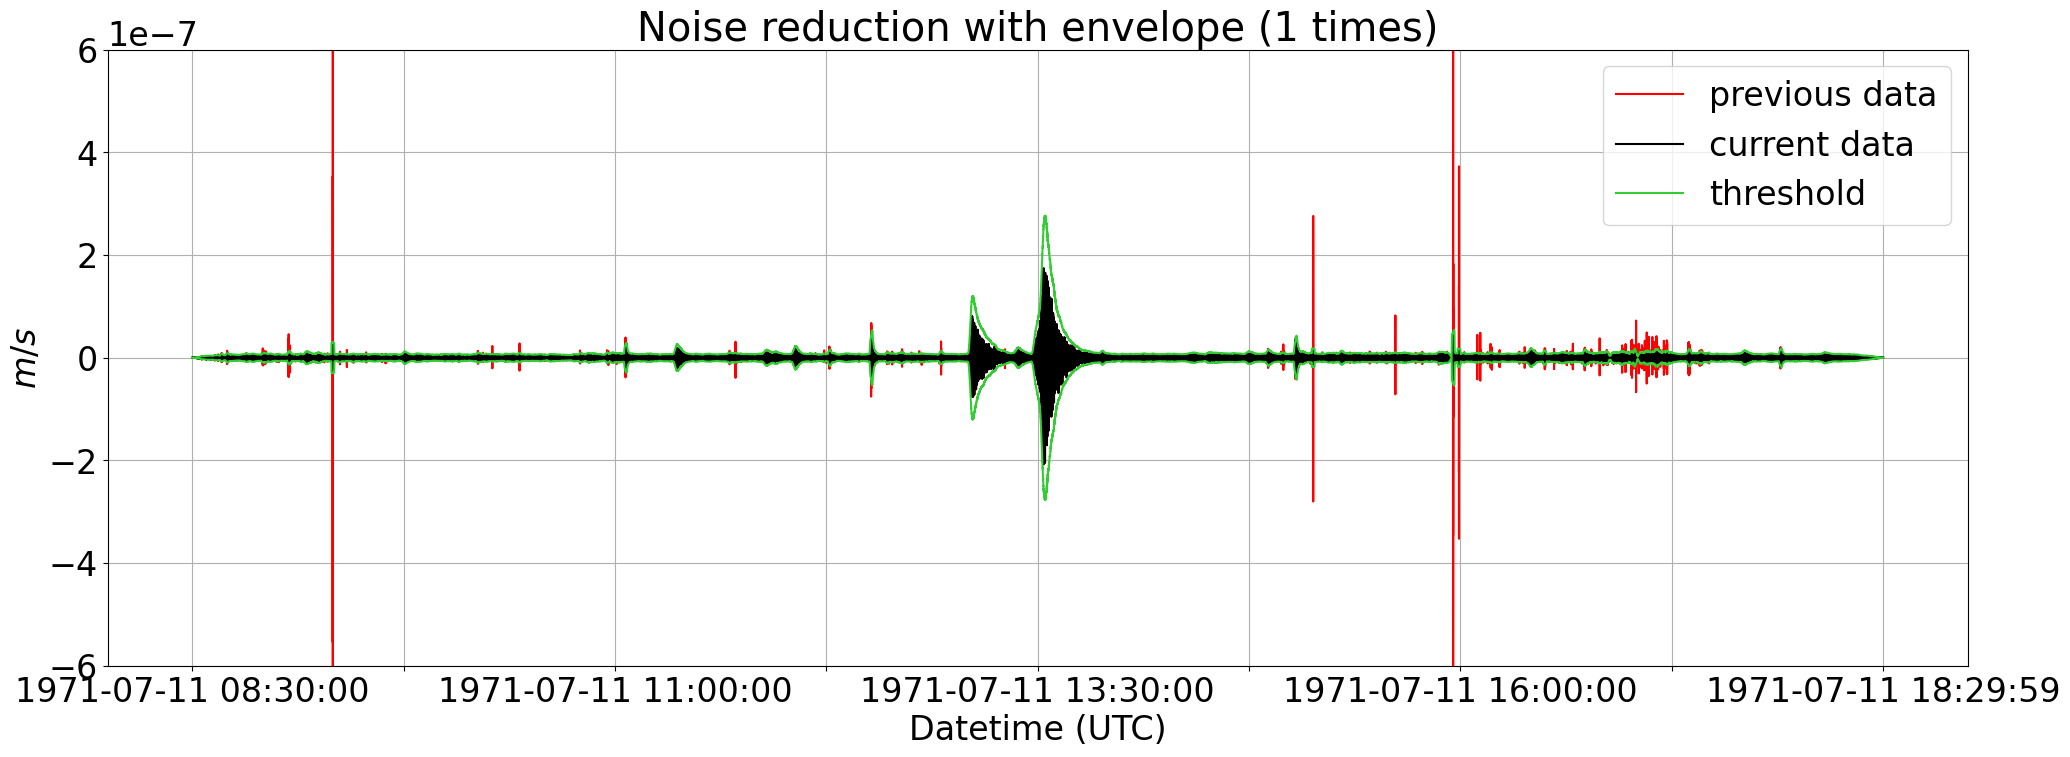

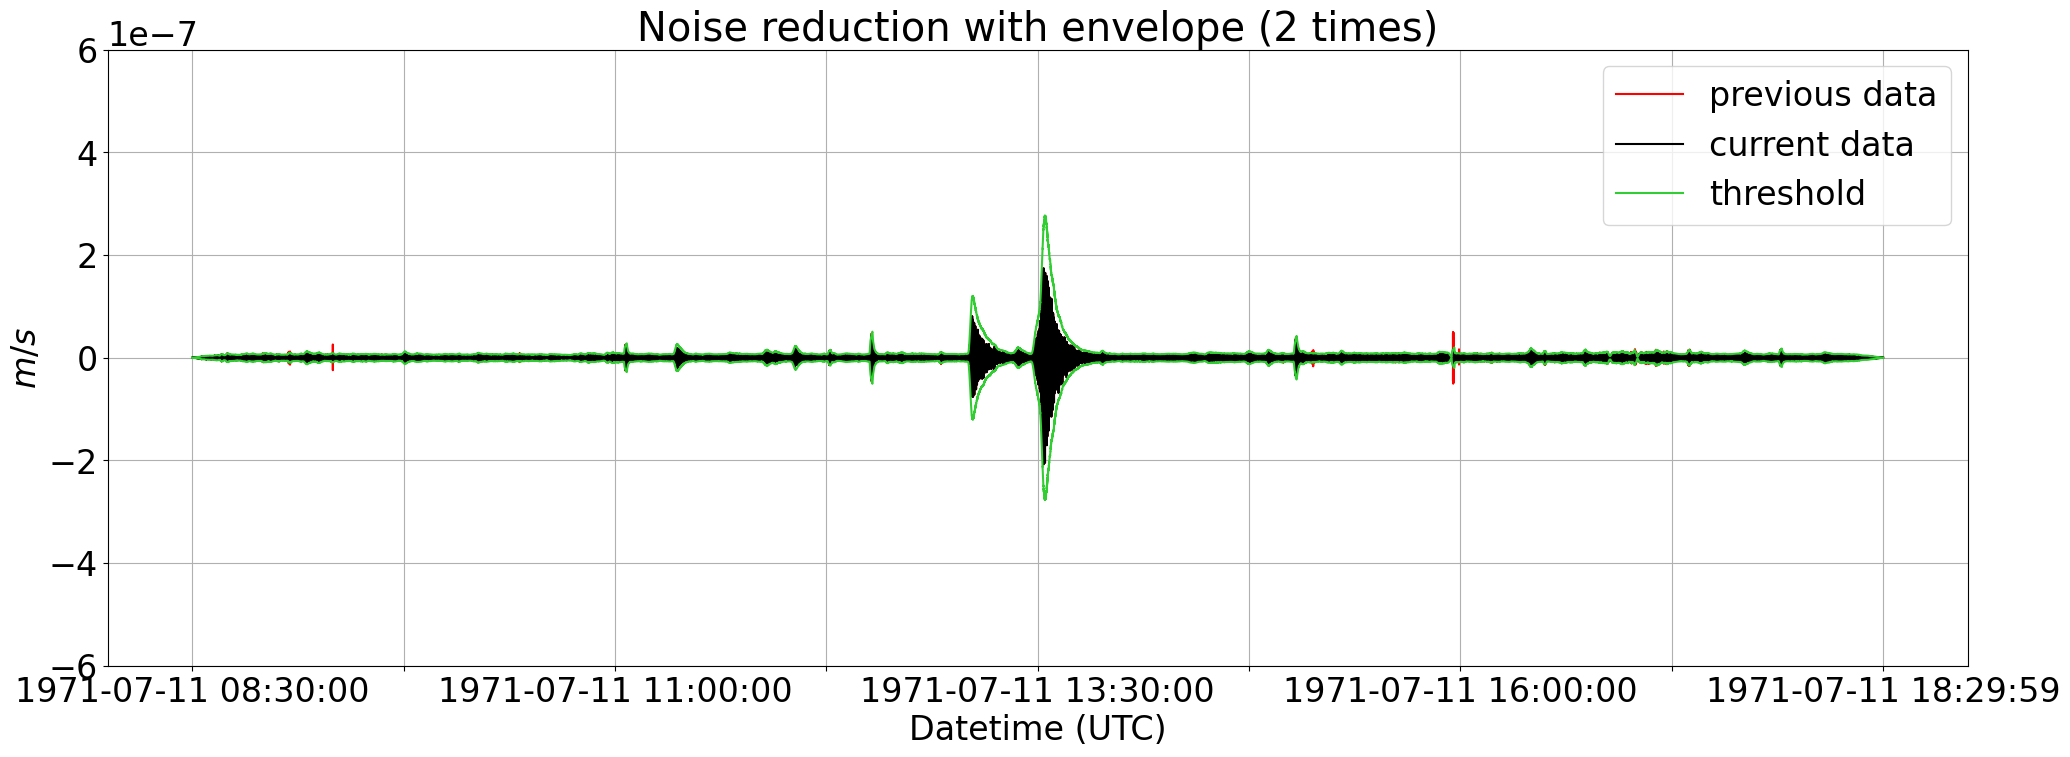

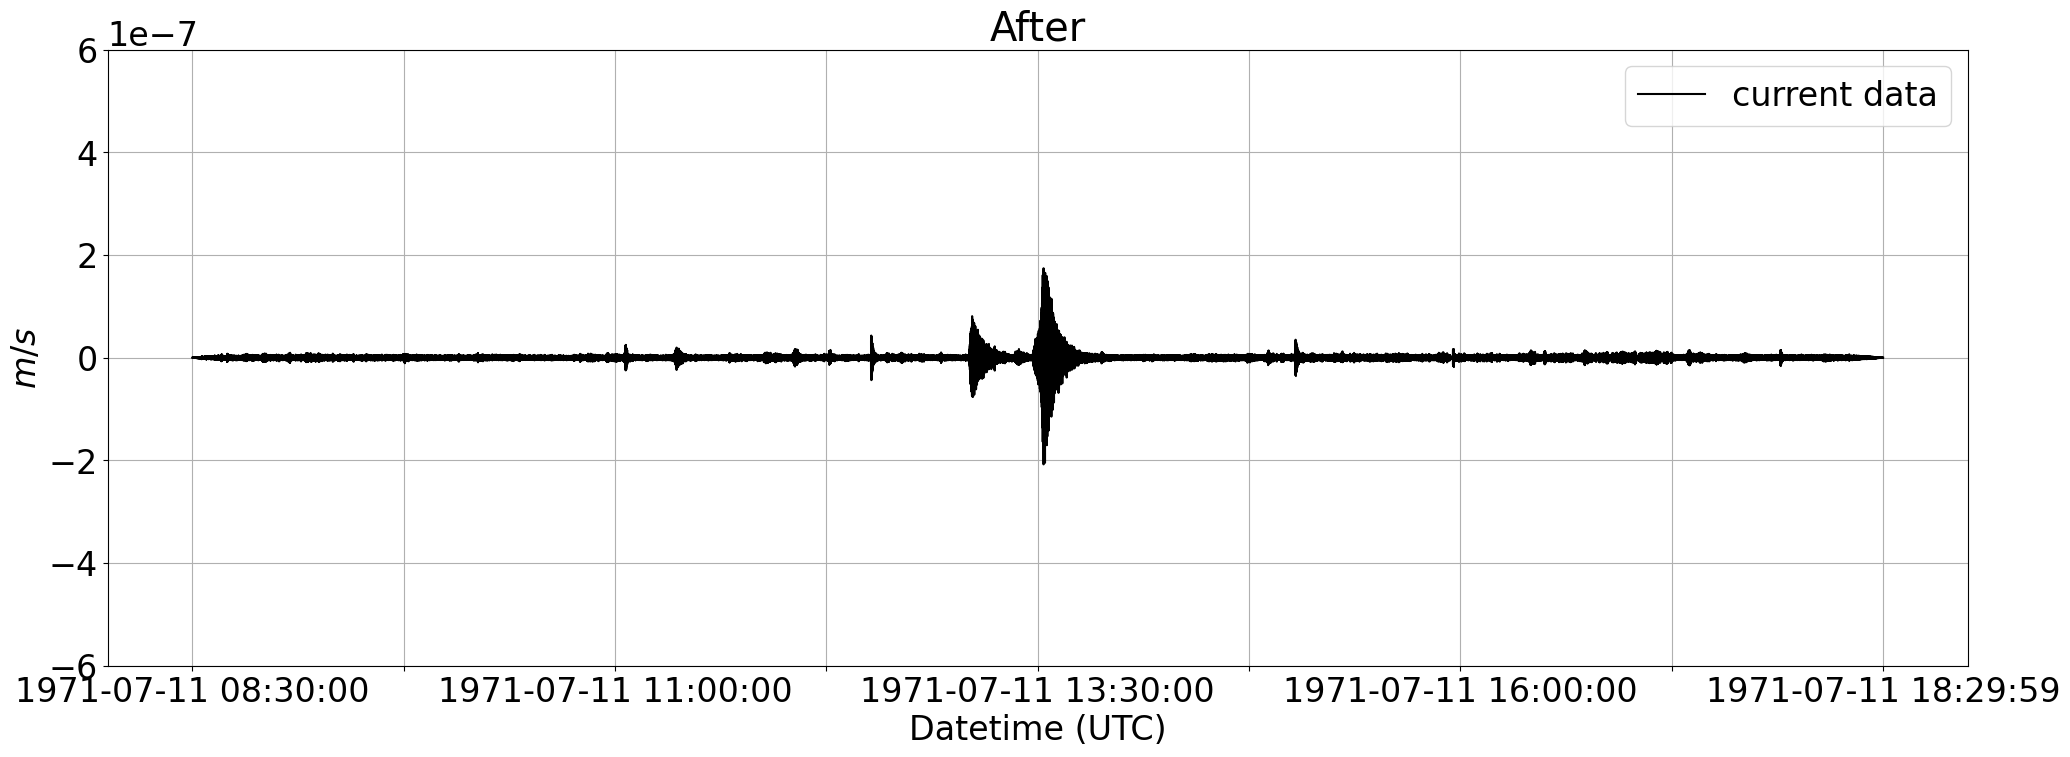

In [3]:
st = reduce_noise(st, times=2, is_plot=True)

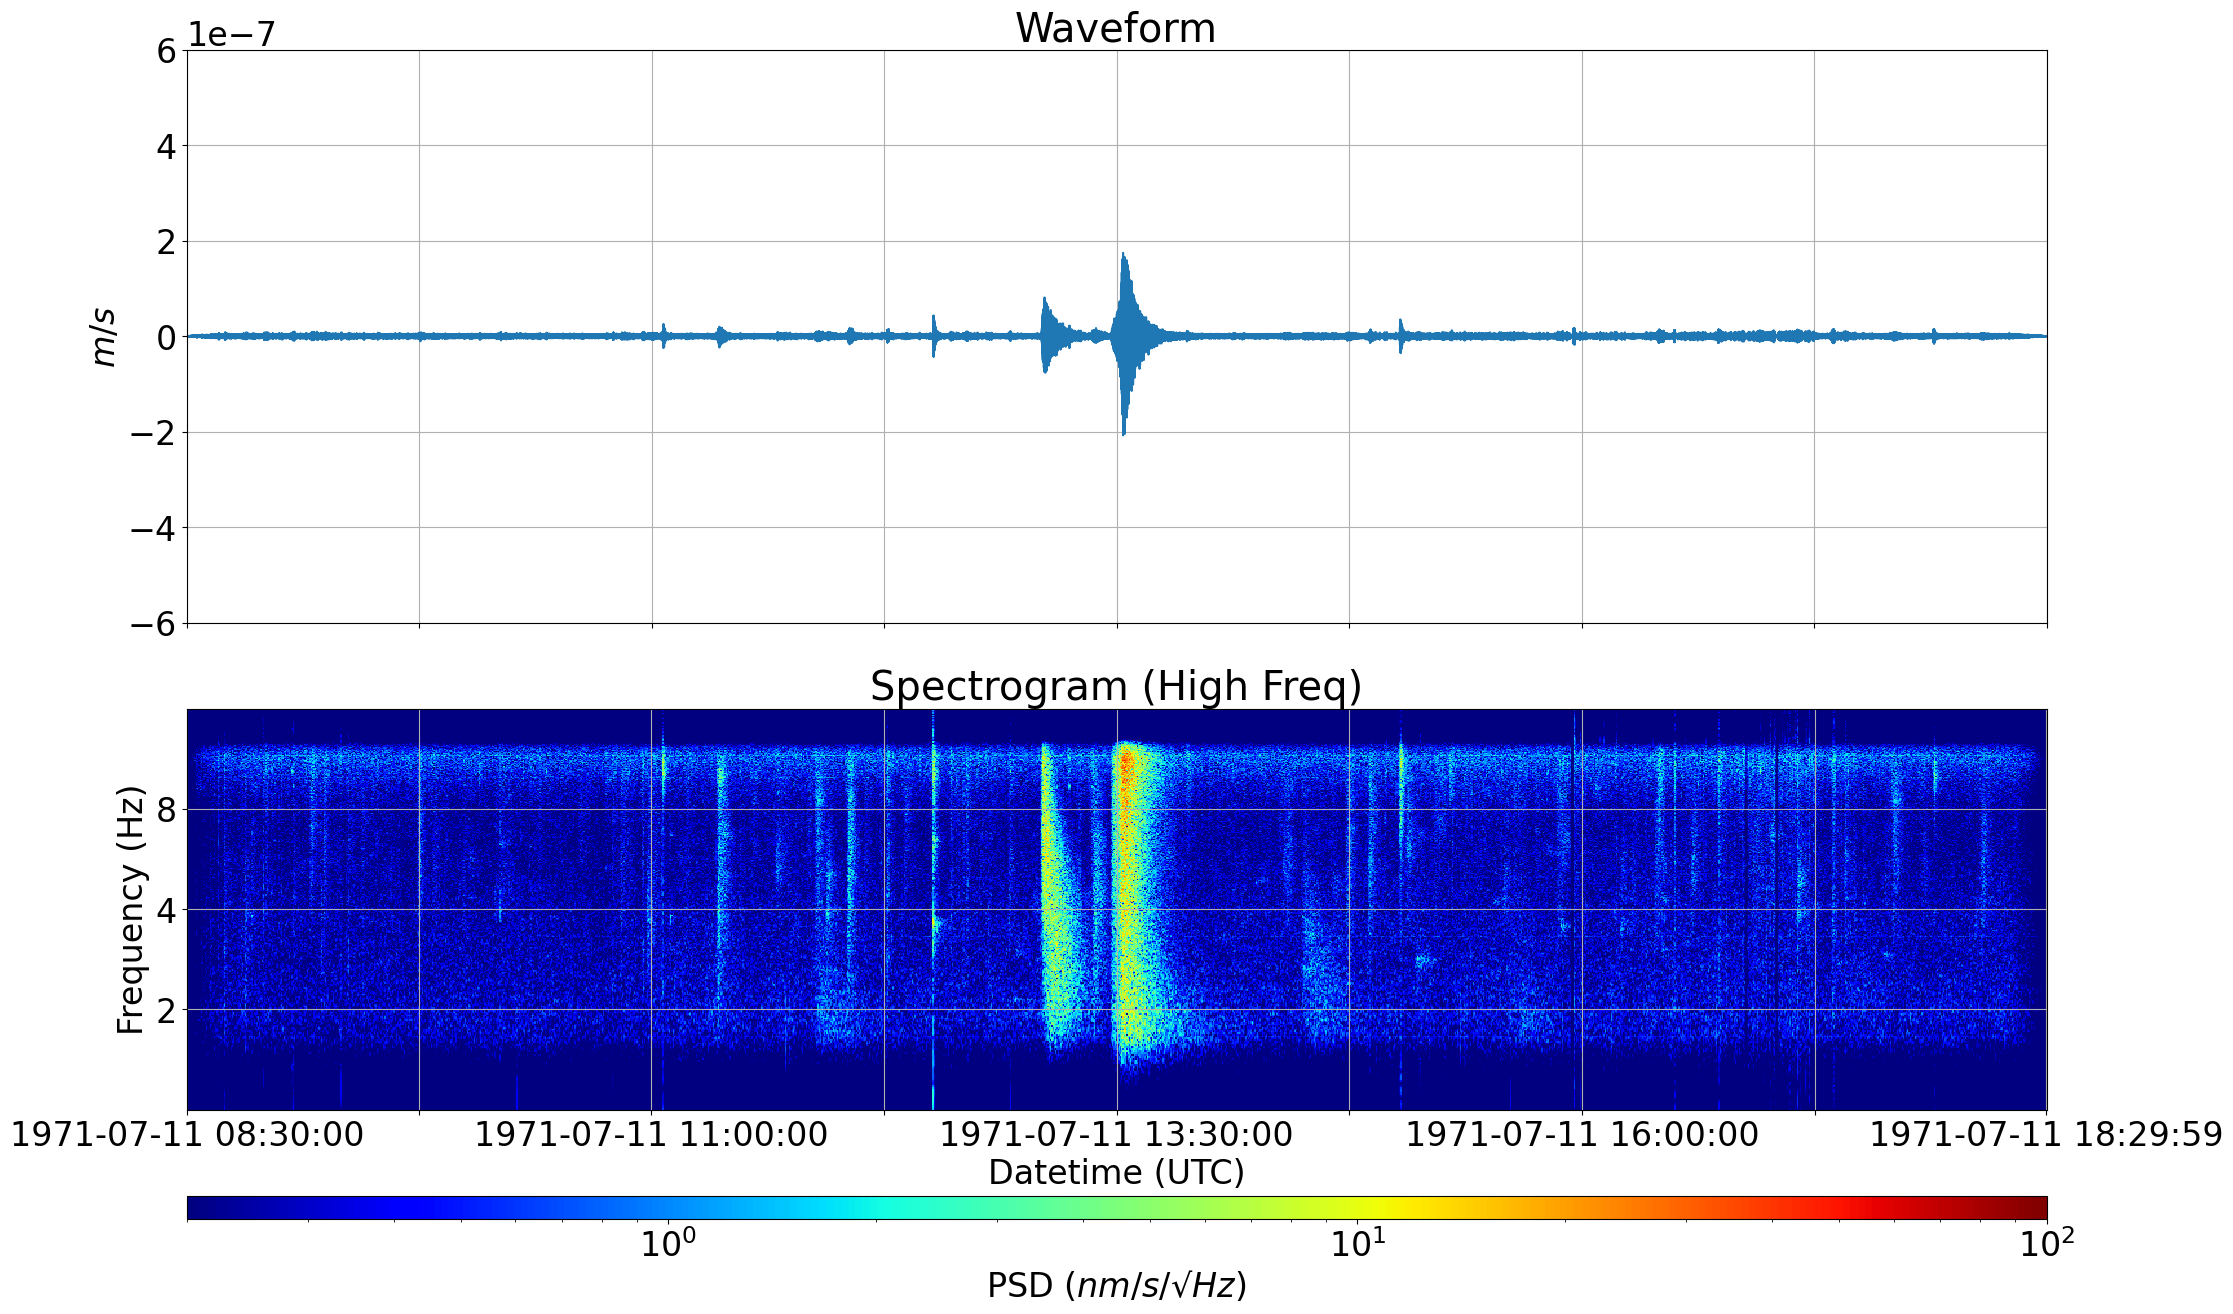

In [4]:
plot_spectrogram(st)

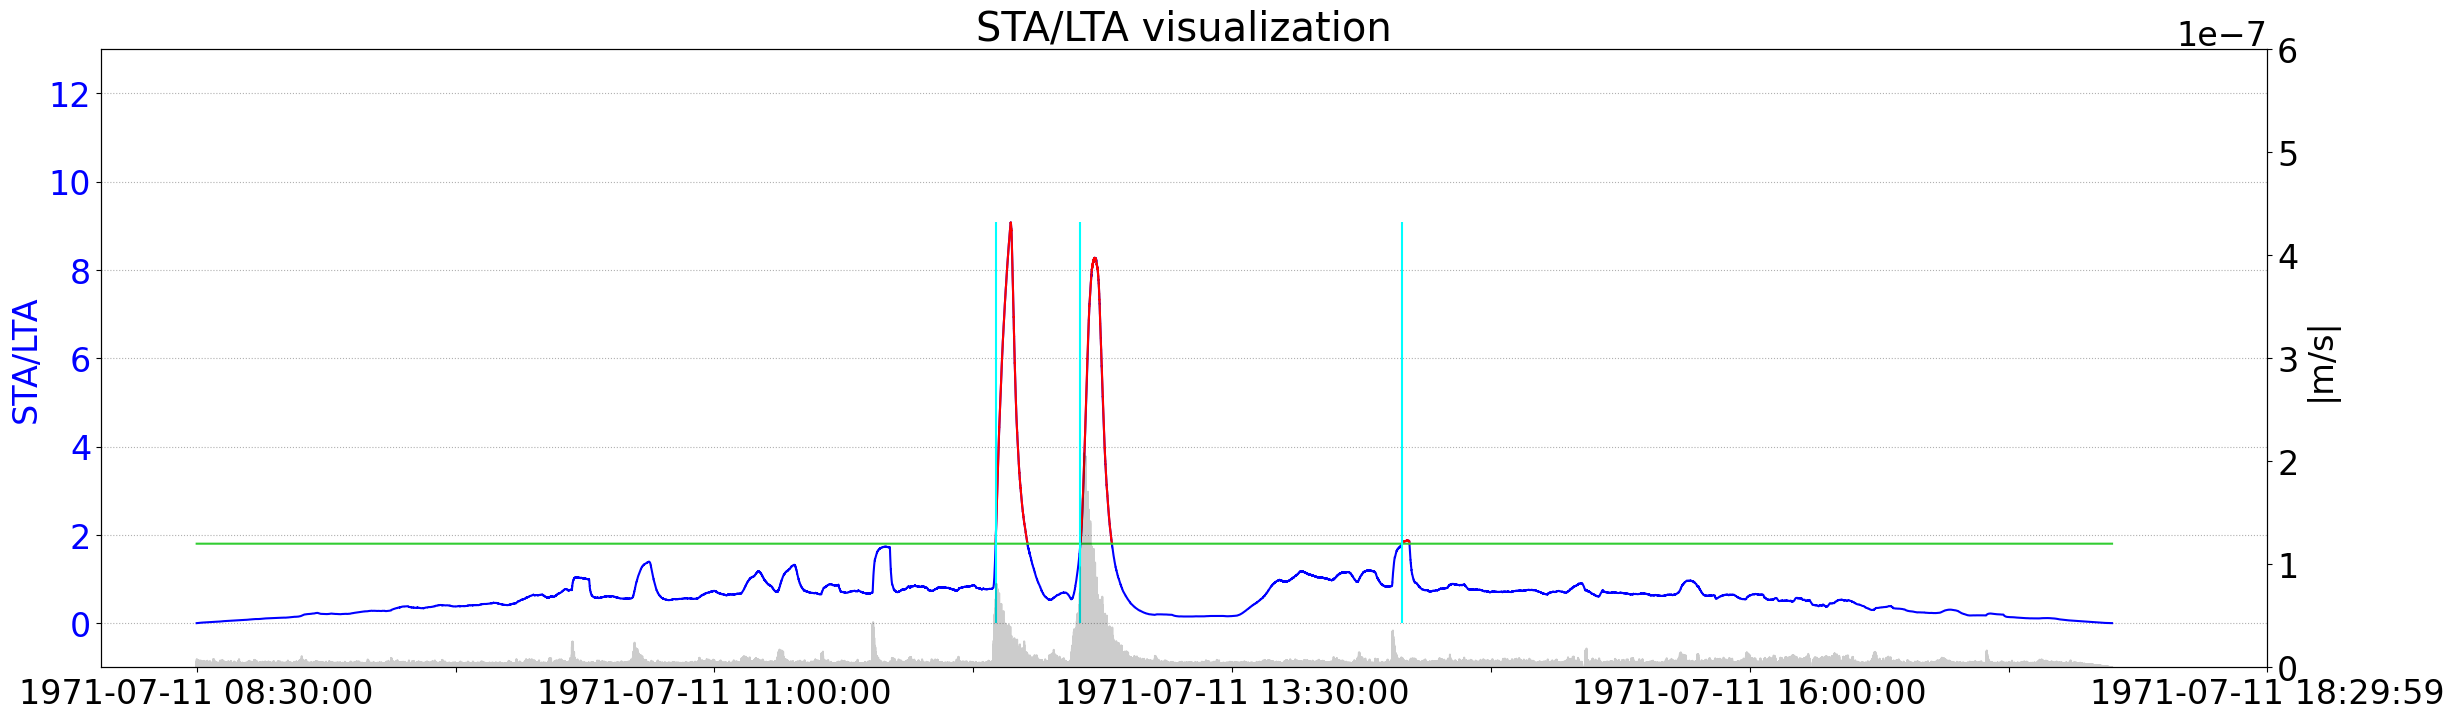

In [5]:
sta_lta = calc_sta_lta(stream=st, tl_sec=2400, ts_sec=300)

start_args, end_args = get_args_over_sta_lta_threshold(
    stream=st,
    input_sta_lta=sta_lta,
    sta_lta_threshold=1.8,
    run_length_threshold=st[0].stats.sampling_rate,  # 1秒
    plot_title="STA/LTA visualization",
)

[{'fwhm': 15879,
  'fwhm_end_arg': 755588,
  'fwhm_start_arg': 739710,
  'profile_argmax': 750164,
  'profile_half': 4.540465439635887,
  'profile_max': 9.080930879271774},
 {'fwhm': 17928,
  'fwhm_end_arg': 836347,
  'fwhm_start_arg': 818420,
  'profile_argmax': 827512,
  'profile_half': 4.139479071948194,
  'profile_max': 8.278958143896388},
 {'fwhm': 20437,
  'fwhm_end_arg': 1122251,
  'fwhm_start_arg': 1101815,
  'profile_argmax': 1116825,
  'profile_half': 0.9352709416572362,
  'profile_max': 1.8705418833144725}]


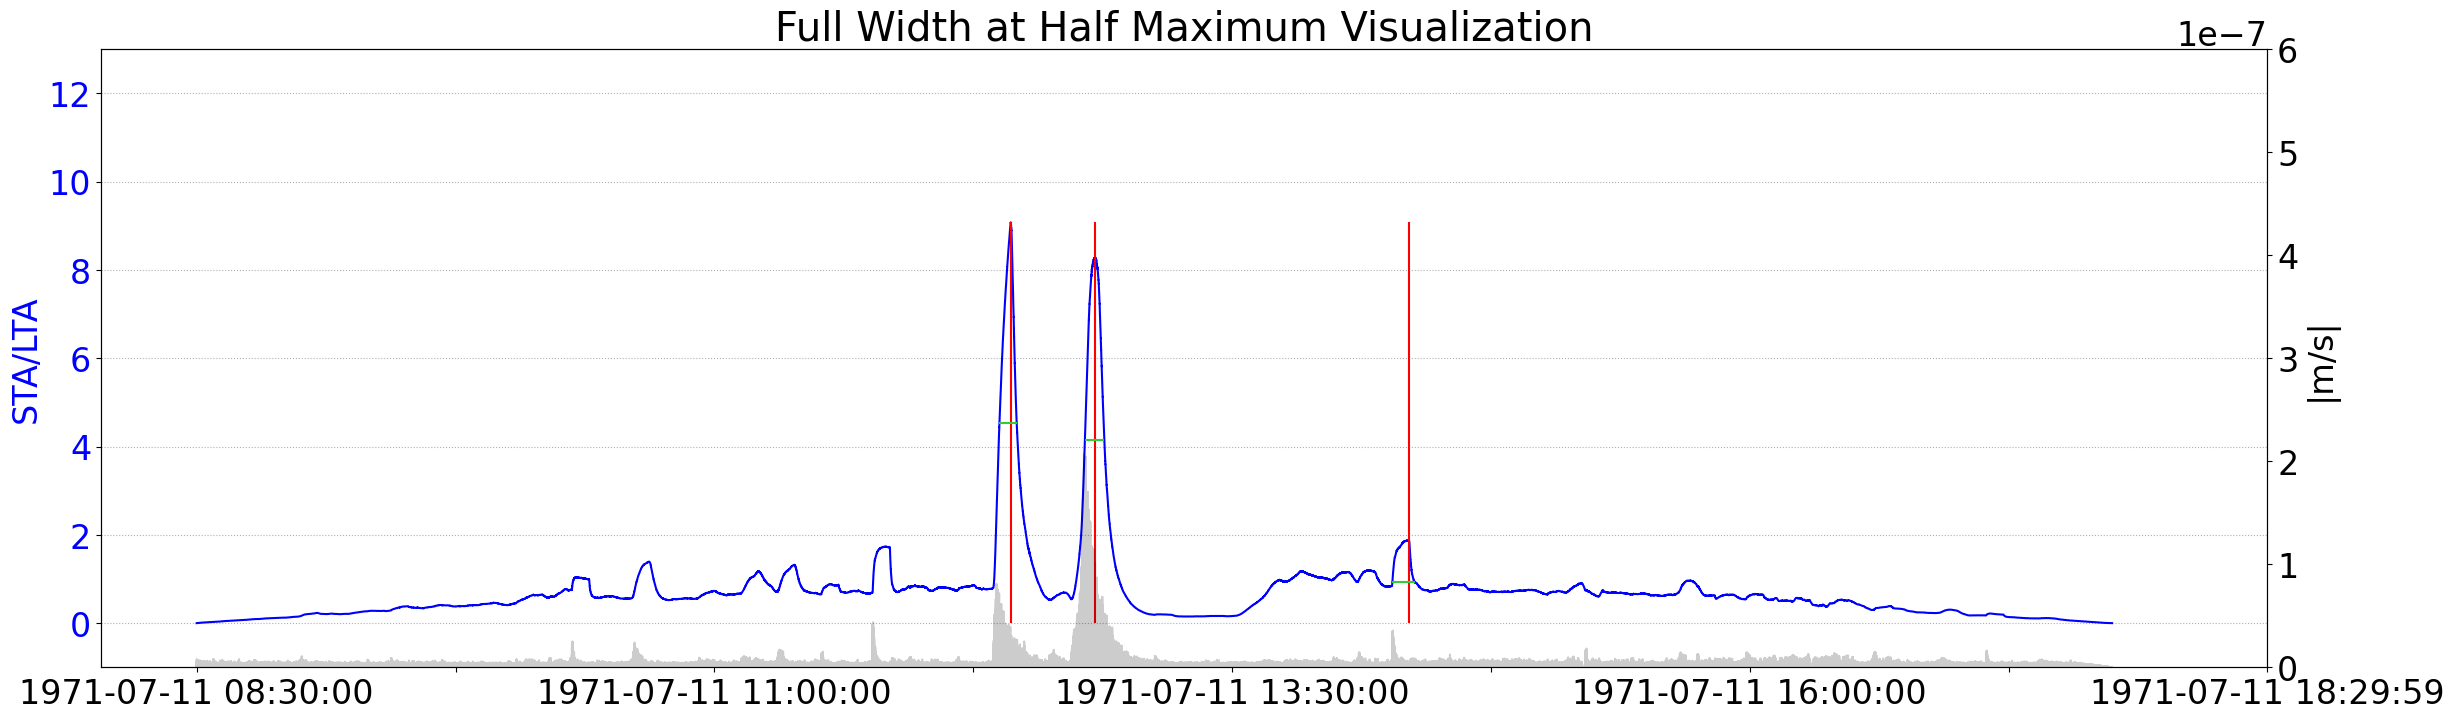

In [6]:
profile_details = get_profile_details(
    stream=st,
    input_sta_lta=sta_lta,
    start_args=start_args,
    end_args=end_args,
    plot_title="Full Width at Half Maximum Visualization",
)

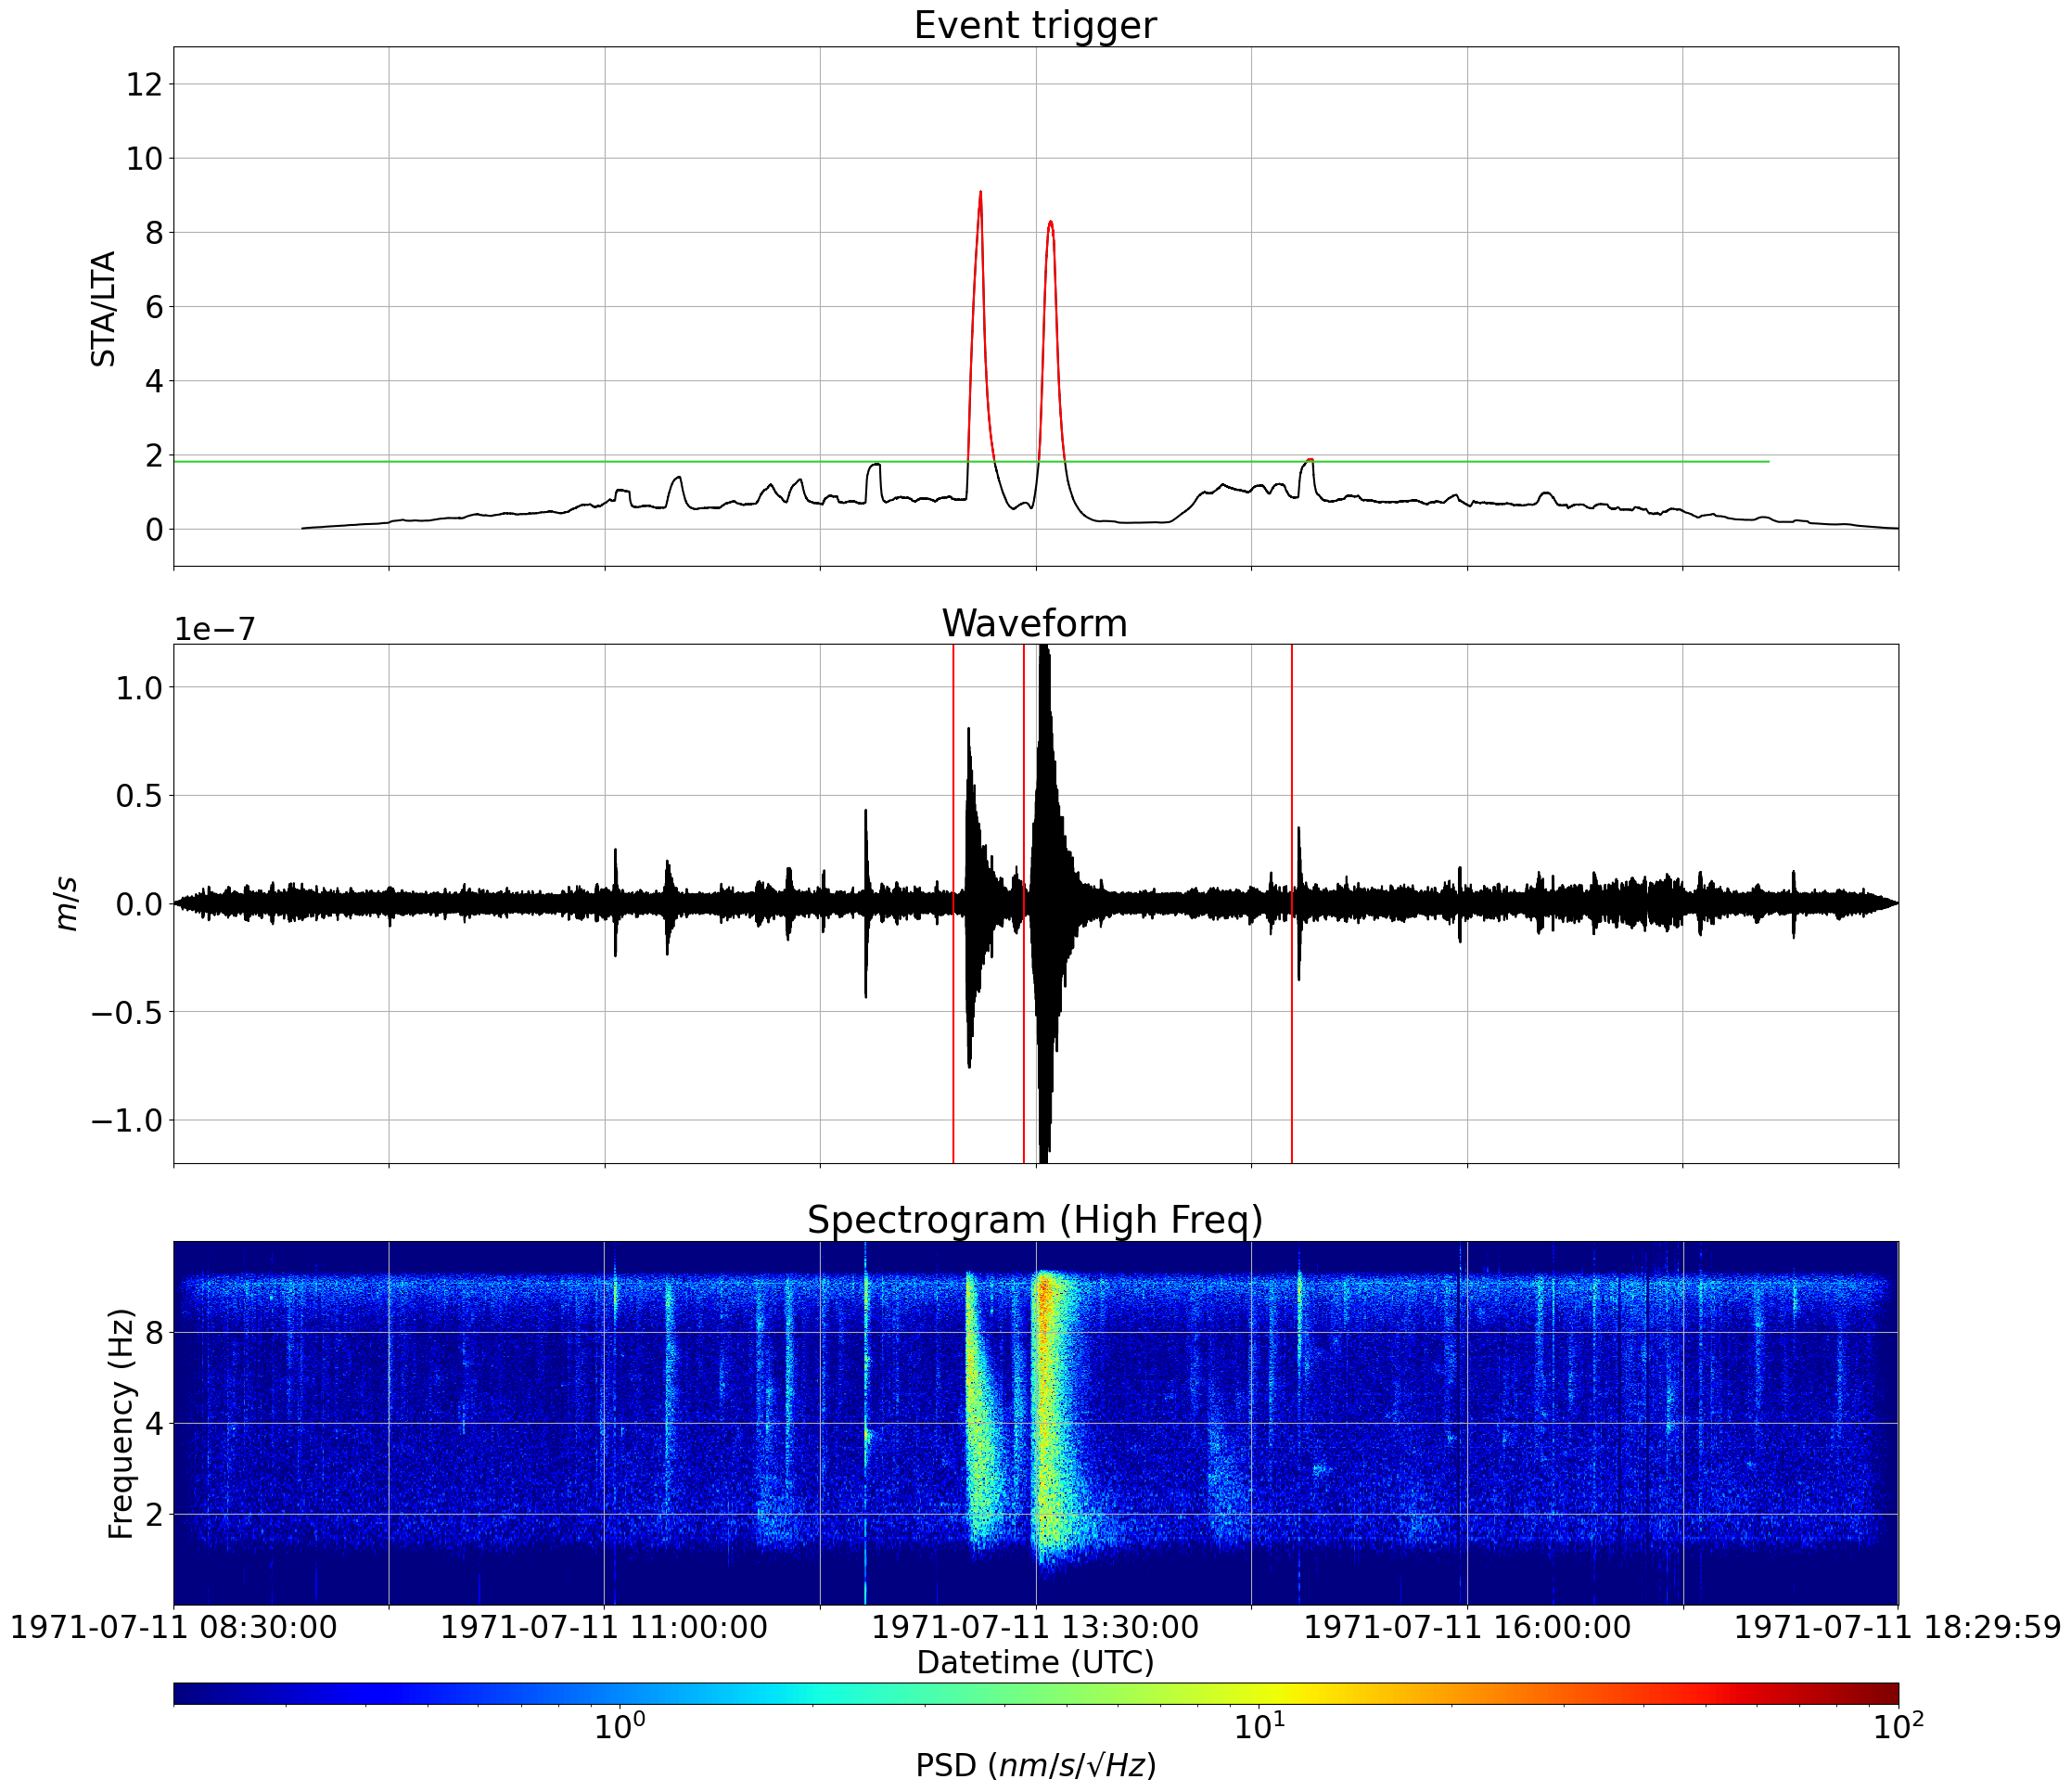

In [7]:
plot_event_detection(
    stream=st,
    sta_lta=sta_lta,
    start_args=start_args,
    sta_lta_threshold=1.8,
    ts_sec=300,
    waveform_ylim=1.2e-7,
    logging_path="./logs/starttimes.txt"
)